In [1]:
# Imports
import pandas as pd
import numpy as np
from os import listdir
import statistics
import matplotlib.pyplot as plt

print("Done.")

Done.


## Read in the .CSV file to do EDA on: 

In [2]:
# Read in the .CSV file
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    names = [ filename for filename in filenames if filename.endswith( suffix ) ]
    return names

In [3]:
# Print the names of all .csv files in the directory (change the path name to your local path):
path = '/Users/jasminesimmons/Smartfin/Smartfin/Mini_Projects/ML_Wave_Stats/'
names = find_csv_filenames( path, suffix=".csv" )
print(len(names))
print(names)

2
['CSE258_A2_Data_Jasmine_Combined_Copy.csv', 'CSE258_A2_Data_Adrian_Combined.csv']


In [4]:
data_csv = pd.read_csv('CSE258_A2_Data_Adrian_Combined.csv')
data_csv = data_csv.drop(columns=['Unnamed: 0'])
data_csv[:10]
#data_csv[:-10]

,identifier,UTC,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,Date,Time,Hs(ft),Tp(s),Dp(deg)
0,facebook_10213517683684254_0006667E2297_170703...,2017-07-03T01:29:22.8120+00:00,0.287304,-3.332729,6.301539,-2.560976,6.951220,5.365854,-30.0,50.0,98.0,2017-07-03,01:29,1.54,5.88,261.0
1,facebook_10213517683684254_0006667E2297_170703...,2017-07-03T01:29:23.0670+00:00,3.064578,-2.336741,12.775460,4.878049,-2.439024,5.853659,-119.0,201.0,393.0,2017-07-03,01:29,1.54,5.88,261.0
2,facebook_10213517683684254_0006667E2297_170703...,2017-07-03T01:29:23.2680+00:00,0.746991,-0.459687,6.531382,-10.609756,3.170732,2.560976,-119.0,205.0,395.0,2017-07-03,01:29,1.54,5.88,261.0
3,facebook_10213517683684254_0006667E2297_170703...,2017-07-03T01:29:23.5190+00:00,3.792415,-6.359000,11.511322,20.487805,-5.121951,15.609756,-127.0,211.0,403.0,2017-07-03,01:29,1.54,5.88,261.0
4,facebook_10213517683684254_0006667E2297_170703...,2017-07-03T01:29:23.7700+00:00,0.268151,-2.202666,6.933608,-5.975610,7.073171,8.170732,-110.0,206.0,396.0,2017-07-03,01:29,1.54,5.88,261.0
5,facebook_10213517683684254_0006667E2297_170703...,2017-07-03T01:29:24.0200+00:00,4.692635,-4.328717,14.786589,6.341463,0.243902,0.000000,-113.0,207.0,395.0,2017-07-03,01:29,1.54,5.88,261.0
6,facebook_10213517683684254_0006667E2297_170703...,2017-07-03T01:29:24.2200+00:00,1.283292,-1.762132,5.535394,-19.756098,2.317073,-13.292683,-112.0,202.0,408.0,2017-07-03,01:29,1.54,5.88,261.0
7,facebook_10213517683684254_0006667E2297_170703...,2017-07-03T01:29:24.4710+00:00,5.861006,-4.328717,11.836933,36.463415,-10.121951,6.829268,-115.0,207.0,413.0,2017-07-03,01:29,1.54,5.88,261.0
8,facebook_10213517683684254_0006667E2297_170703...,2017-07-03T01:29:24.7220+00:00,1.072602,-3.773262,7.508216,-0.609756,-0.243902,5.975610,-118.0,194.0,408.0,2017-07-03,01:29,1.54,5.88,261.0
9,facebook_10213517683684254_0006667E2297_170703...,2017-07-03T01:29:24.9710+00:00,3.447650,-4.558560,12.047623,-0.731707,4.878049,14.268293,-109.0,197.0,403.0,2017-07-03,01:29,1.54,5.88,261.0


## Compute the standard deviation and mean of the 28 rides

In [5]:
# Compute the standard deviation and mean of the 28 rides
columns = data_csv.columns
print(columns)

Index(['identifier', 'UTC', 'IMU A1', 'IMU A2', 'IMU A3', 'IMU G1', 'IMU G2',
       'IMU G3', 'IMU M1', 'IMU M2', 'IMU M3', 'Date', 'Time', 'Hs(ft)',
       'Tp(s)', 'Dp(deg)'],
      dtype='object')


In [6]:
data_csv['IMU A1'][0]

0.28730419921875

In [7]:
# Compute the standard deviation over each minute: 
def compute_standard_deviations(input_label): 
    old_time = '16:37'
    stds_minute_intervals = []
    wave_height_minute_intervals = []
    new_std = []
    minute_times = []
    for i in range(0, len(data_csv['Time'])):
        t = data_csv['Time'][i]
        if t != old_time: 
            #take the standard deviation and append it to stds
            if len(new_std) > 2:
                std = statistics.stdev(new_std)
                stds_minute_intervals.append(std)
                wave_height_minute_intervals.append(data_csv['Hs(ft)'][i-1])
                minute_times.append(data_csv['Time'][i-1])
                #reset new_std to be a new list
                new_std = []
            old_time = t
        else:
            new_std.append(data_csv[input_label][i])
    
    return stds_minute_intervals, wave_height_minute_intervals, minute_times

In [8]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
a1_stds, a1_wave_heights, a1_minutes = compute_standard_deviations("IMU A1")
a2_stds, a2_wave_heights, a2_minutes = compute_standard_deviations("IMU A2")
a3_stds, a3_wave_heights, a3_minutes = compute_standard_deviations("IMU A3")

In [9]:
# Compute the standard deviation of G1, G2, G3 columns over minute intervals for significant wave height. 
g1_stds, g1_wave_heights, g1_minutes = compute_standard_deviations("IMU G1")
g2_stds, g2_wave_heights, g2_minutes = compute_standard_deviations("IMU G2")
g3_stds, g3_wave_heights, g3_minutes = compute_standard_deviations("IMU G3")

In [10]:
# Compute the standard deviation of M1, M2, M3 columns over minute intervals for significant wave height. 
m1_stds, m1_wave_heights, m1_minutes = compute_standard_deviations("IMU M1")
m2_stds, m2_wave_heights, m2_minutes = compute_standard_deviations("IMU M2")
m3_stds, m3_wave_heights, m3_minutes = compute_standard_deviations("IMU M3")

In [11]:
#print(len(stds_minute_intervals))
#print(len(wave_height_minute_intervals))
#print(stds_minute_intervals[:10])

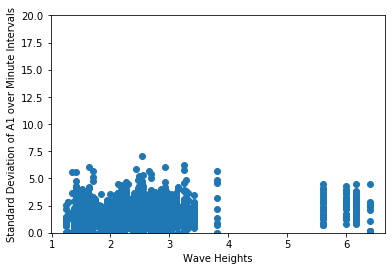

In [12]:
x = a1_wave_heights
y = a1_stds
plt.xlabel('Wave Heights')
plt.ylabel('Standard Deviation of A1 over Minute Intervals')
axes = plt.gca()
axes.set_ylim([0,20])
plt.scatter(x, y)
plt.show()

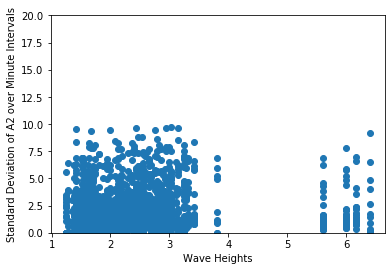

In [13]:
x = a2_wave_heights
y = a2_stds
plt.xlabel('Wave Heights')
plt.ylabel('Standard Deviation of A2 over Minute Intervals')
axes = plt.gca()
axes.set_ylim([0,20])
plt.scatter(x, y)
plt.show()

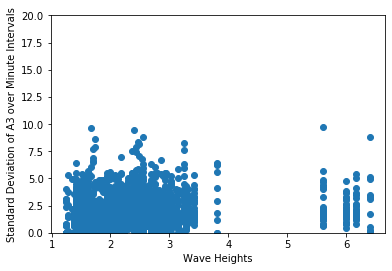

In [14]:
x = a3_wave_heights
y = a3_stds
plt.xlabel('Wave Heights')
plt.ylabel('Standard Deviation of A3 over Minute Intervals')
axes = plt.gca()
axes.set_ylim([0,20])
plt.scatter(x, y)
plt.show()

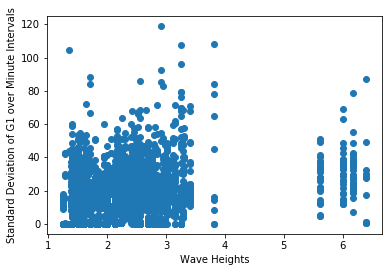

In [15]:
x = g1_wave_heights
y = g1_stds
plt.xlabel('Wave Heights')
plt.ylabel('Standard Deviation of G1 over Minute Intervals')
axes = plt.gca()
#axes.set_ylim([0,20])
plt.scatter(x, y)
plt.show()

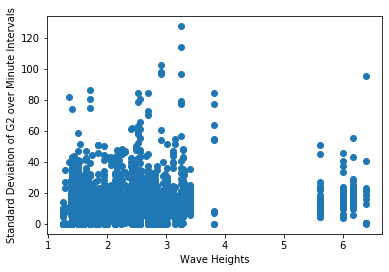

In [16]:
x = g2_wave_heights
y = g2_stds
plt.xlabel('Wave Heights')
plt.ylabel('Standard Deviation of G2 over Minute Intervals')
axes = plt.gca()
#axes.set_ylim([0,20])
plt.scatter(x, y)
plt.show()

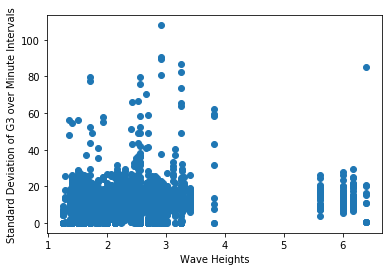

In [17]:
x = g3_wave_heights
y = g3_stds
plt.xlabel('Wave Heights')
plt.ylabel('Standard Deviation of G3 over Minute Intervals')
axes = plt.gca()
#axes.set_ylim([0,20])
plt.scatter(x, y)
plt.show()

Plotting M1, M2, M3 Means vs. Wave Heights:


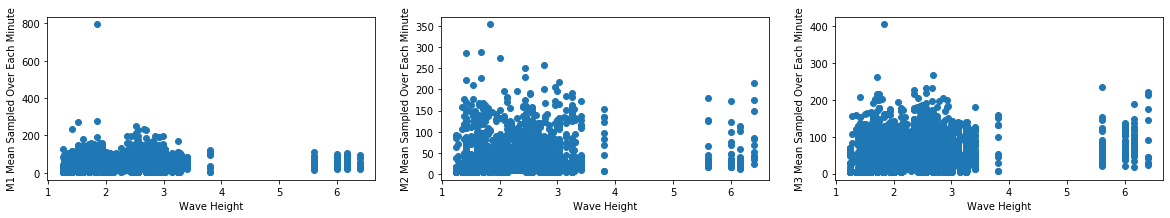

In [18]:
print("Plotting M1, M2, M3 Means vs. Wave Heights:")
f = plt.figure(figsize=(20,3))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

x1, y1 = m1_wave_heights, m1_stds
x2, y2 = m2_wave_heights, m2_stds
x3, y3 = m3_wave_heights, m3_stds

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("M1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("M2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("M3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Heights:


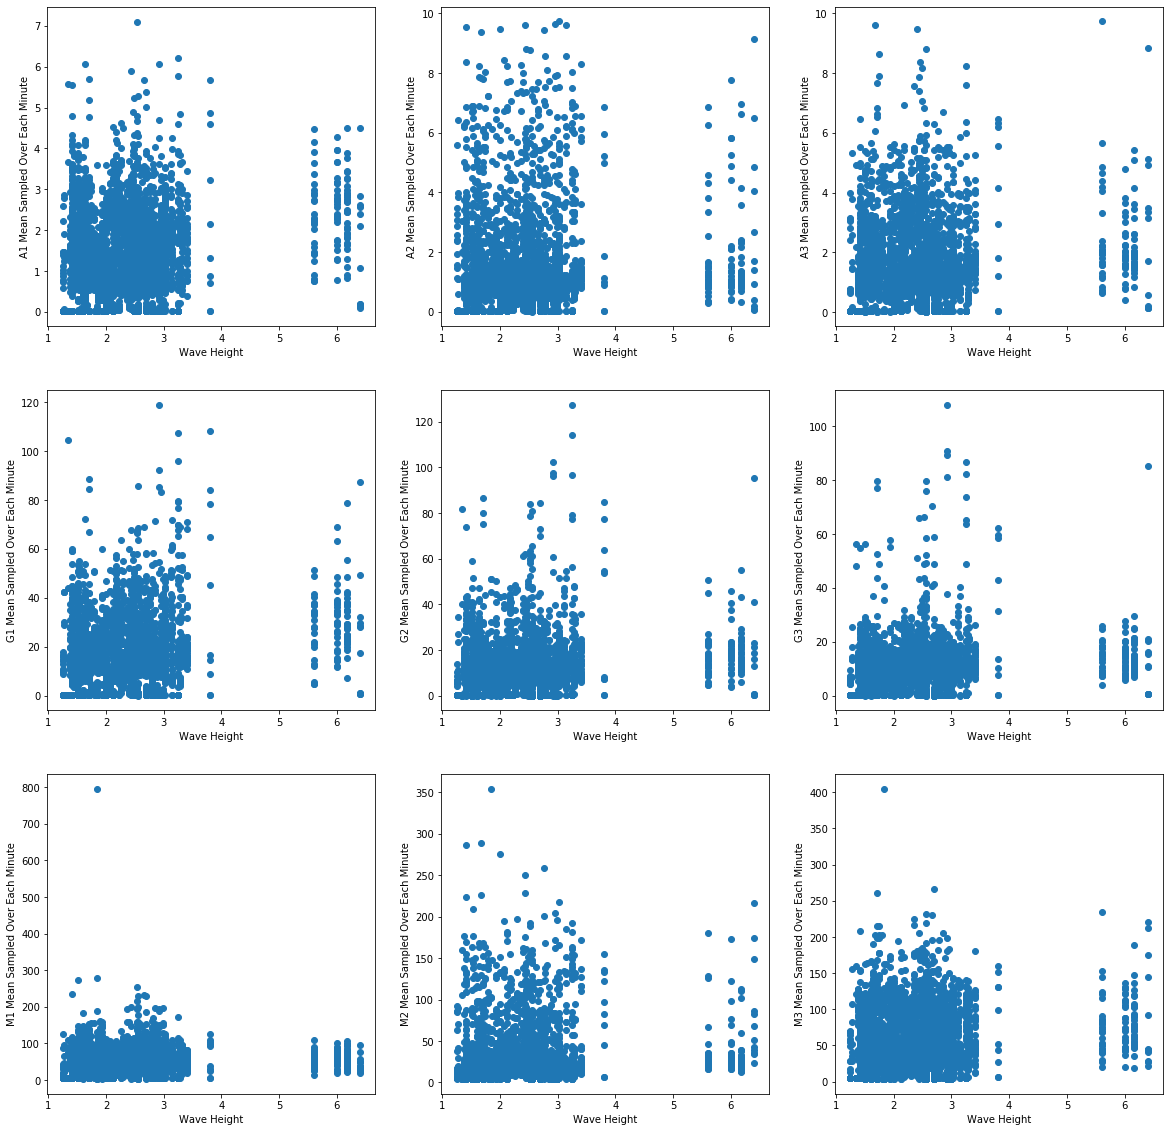

In [19]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Heights:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = a1_wave_heights, a1_stds
x2, y2 = a2_wave_heights, a2_stds
x3, y3 = a3_wave_heights, a3_stds

x4, y4 = g1_wave_heights, g1_stds
x5, y5 = g2_wave_heights, g2_stds
x6, y6 = g3_wave_heights, g3_stds

x7, y7 = m1_wave_heights, m1_stds
x8, y8 = m2_wave_heights, m2_stds
x9, y9 = m3_wave_heights, m3_stds

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("A2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("A3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Height")
ax4.set_ylabel("G1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Height")
ax5.set_ylabel("G2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Height")
ax6.set_ylabel("G3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Height")
ax7.set_ylabel("M1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Height")
ax8.set_ylabel("M2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Height")
ax9.set_ylabel("M3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

## From this data (above), we don't really see a trend other than maybe that mid-wave heights (around 2.5-3ft) seem to have a higher standard deviation than wave heights on either end of the spectrum (smaller or larger wave heights).

In [20]:
# Let's try plotting the mean values for each: 
def compute_means(input_label): 
    old_time = '16:37'
    means_minute_intervals = []
    wave_height_minute_intervals = []
    new_mean = []
    minute_times = []
    for i in range(0, len(data_csv['Time'])):
        t = data_csv['Time'][i]
        if t != old_time: 
            #take the standard deviation and append it to stds
            if len(new_mean) != 0:
                mean = statistics.mean(new_mean)
                means_minute_intervals.append(mean)
                wave_height_minute_intervals.append(data_csv['Hs(ft)'][i-1])
                minute_times.append(data_csv['Time'][i-1])
                #reset new_std to be a new list
                new_mean = []
            old_time = t
        else:
            new_mean.append(data_csv[input_label][i])
    
    return means_minute_intervals, wave_height_minute_intervals, minute_times

In [21]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
a1_means, a1_wave_heights, a1_minutes = compute_means("IMU A1")
a2_means, a2_wave_heights, a2_minutes = compute_means("IMU A2")
a3_means, a3_wave_heights, a3_minutes = compute_means("IMU A3")

In [22]:
# Compute the standard deviation of G1, G2, G3 columns over minute intervals for significant wave height. 
g1_means, g1_wave_heights, g1_minutes = compute_means("IMU G1")
g2_means, g2_wave_heights, g2_minutes = compute_means("IMU G2")
g3_means, g3_wave_heights, g3_minutes = compute_means("IMU G3")

In [23]:
# Compute the standard deviation of M1, M2, M3 columns over minute intervals for significant wave height. 
m1_means, m1_wave_heights, m1_minutes = compute_means("IMU M1")
m2_means, m2_wave_heights, m2_minutes = compute_means("IMU M2")
m3_means, m3_wave_heights, m3_minutes = compute_means("IMU M3")

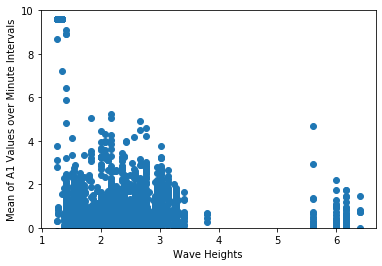

In [24]:
x = a1_wave_heights
y = a1_means
plt.xlabel('Wave Heights')
plt.ylabel('Mean of A1 Values over Minute Intervals')
axes = plt.gca()
axes.set_ylim([0,10])
plt.scatter(x, y)
plt.show()

Plotting A1, A2, A3 Means vs. Wave Heights:


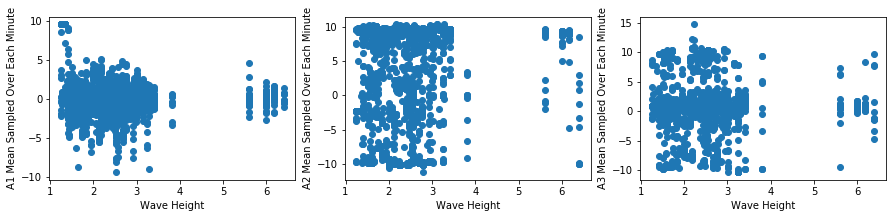

In [25]:
print("Plotting A1, A2, A3 Means vs. Wave Heights:")
f = plt.figure(figsize=(15,3))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

x1, y1 = a1_wave_heights, a1_means
x2, y2 = a2_wave_heights, a2_means
x3, y3 = a3_wave_heights, a3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 Mean Sampled Over Each Minute")
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("A2 Mean Sampled Over Each Minute")
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("A3 Mean Sampled Over Each Minute")
plt.show()

Plotting G1, G2, G3 Means vs. Wave Heights:


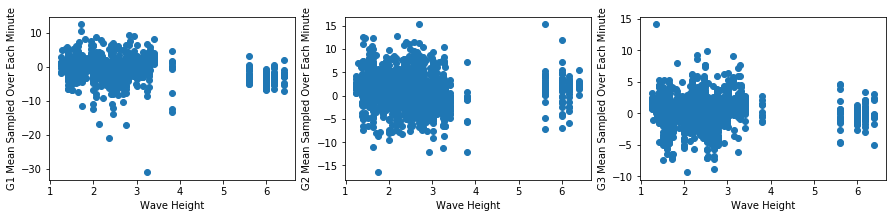

In [26]:
print("Plotting G1, G2, G3 Means vs. Wave Heights:")
f = plt.figure(figsize=(15,3))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

x1, y1 = g1_wave_heights, g1_means
x2, y2 = g2_wave_heights, g2_means
x3, y3 = g3_wave_heights, g3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("G1 Mean Sampled Over Each Minute")
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("G2 Mean Sampled Over Each Minute")
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("G3 Mean Sampled Over Each Minute")
plt.show()

Plotting M1, M2, M3 Means vs. Wave Heights:


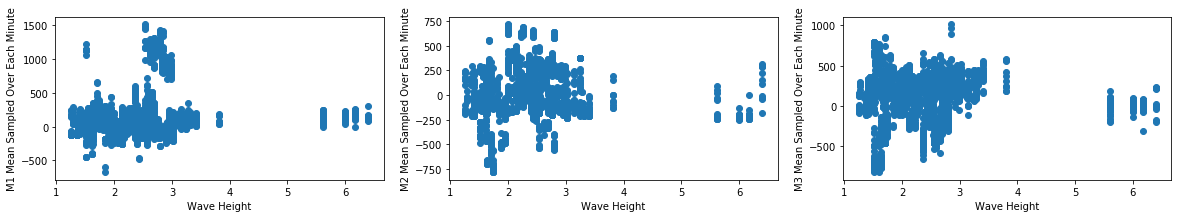

In [27]:
print("Plotting M1, M2, M3 Means vs. Wave Heights:")
f = plt.figure(figsize=(20,3))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

x1, y1 = m1_wave_heights, m1_means
x2, y2 = m2_wave_heights, m2_means
x3, y3 = m3_wave_heights, m3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("M1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("M2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("M3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Heights:


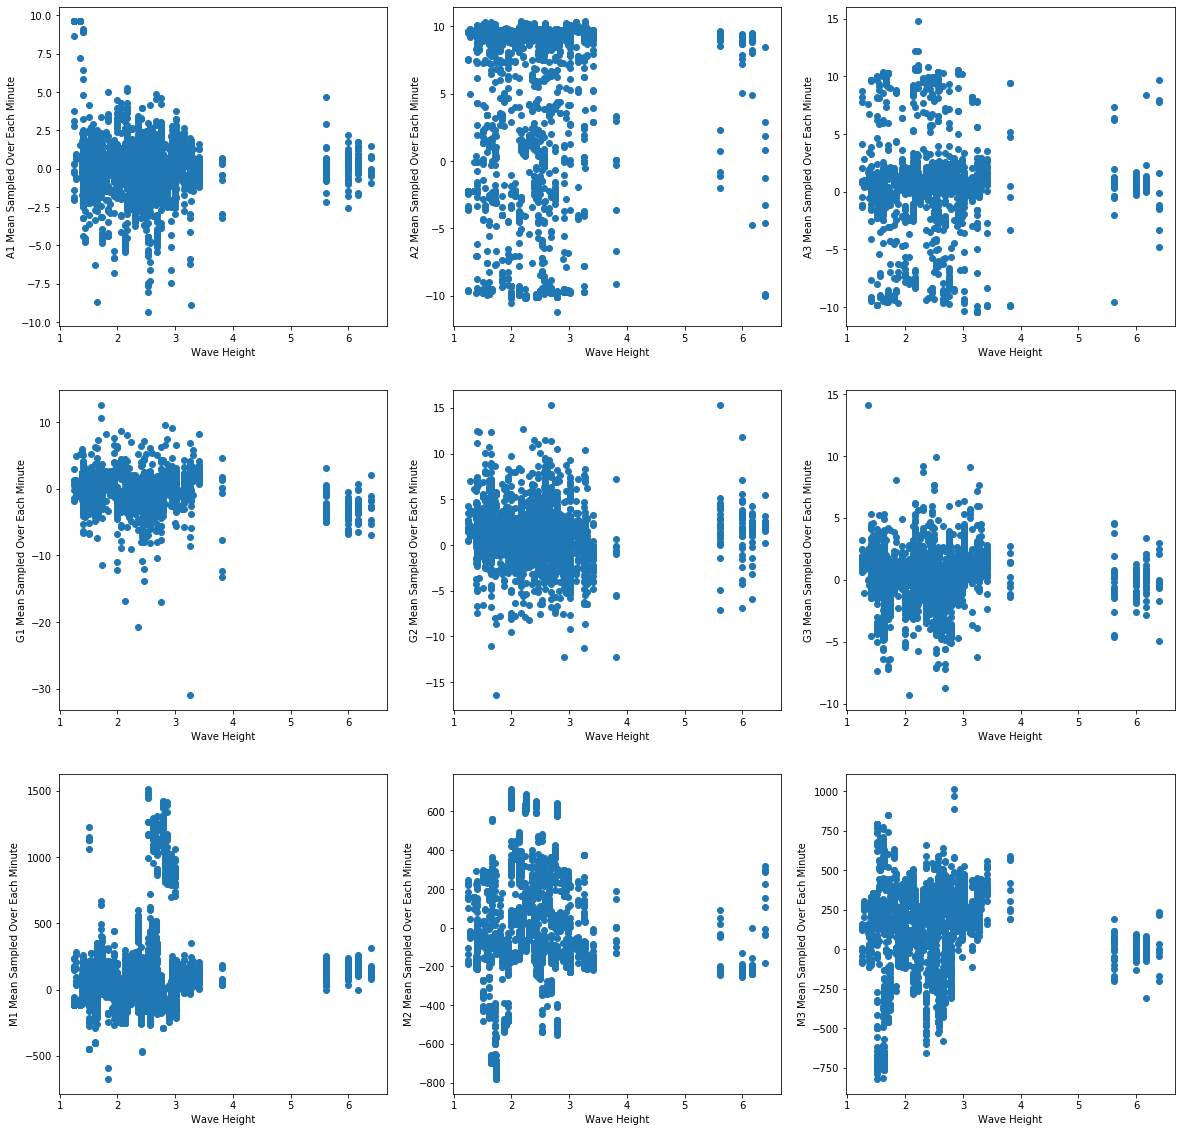

In [28]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Heights:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = a1_wave_heights, a1_means
x2, y2 = a2_wave_heights, a2_means
x3, y3 = a3_wave_heights, a3_means

x4, y4 = g1_wave_heights, g1_means
x5, y5 = g2_wave_heights, g2_means
x6, y6 = g3_wave_heights, g3_means

x7, y7 = m1_wave_heights, m1_means
x8, y8 = m2_wave_heights, m2_means
x9, y9 = m3_wave_heights, m3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("A2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("A3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Height")
ax4.set_ylabel("G1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Height")
ax5.set_ylabel("G2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Height")
ax6.set_ylabel("G3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Height")
ax7.set_ylabel("M1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Height")
ax8.set_ylabel("M2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Height")
ax9.set_ylabel("M3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()